##### <strong>Target:</strong>
- 'Obsessive-Compulsive Disorder'
- Case: 11.61%

##### <strong>Parameters:</strong>
1. Cross Validation nubmer: 5 (outer and inner)
2. n_estimator: np.arange(20, 200, 20)
3. max_depth: np.arange(10, 100, 10)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.model_selection import KFold, StratifiedKFold, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import r2_score, classification_report, confusion_matrix, accuracy_score, log_loss

#### 1. Raw GPS data

In [3]:
my_data = pd.read_csv('/home/ubuntu/SEOYOON/KSAD/Data/KSAD_GPS_raw_baseline.csv', header=0)
my_data['KEY'] = my_data['KEY'].astype(str)
len(my_data)

4561

In [4]:
target = 'ksads_11_917_p'
my_data = my_data.dropna(subset=[target])
len(my_data)

4519

In [5]:
print("case number: {}".format(sum(my_data[target])))
print("case ratio: {:.2f}%".format(sum(my_data[target])/len(my_data)*100))

case number: 319.0
case ratio: 7.06%


#### CONSTANTS:

In [6]:
k_fold = 5

num_samples = len(my_data)
each_fold_size = int(num_samples/k_fold) +1

print('num_samples: ', num_samples)
print('fold_size: ', each_fold_size)

num_samples:  4519
fold_size:  904


#### PARAMETERS:

In [7]:
X = my_data.iloc[:, 1:27]
features = X.columns

In [8]:
y = my_data[target].astype(int)

In [9]:
X = X.to_numpy()
y = y.to_numpy().ravel()

In [10]:
def plot_feature_importances(model):
    n_features = len(features)
    plt.figure(figsize=(6,6))
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), features)
    plt.xlabel("Feature Importances")
    plt.ylabel("Features")
    plt.ylim(-1, n_features)
    plt.show()

In [11]:
from sklearn.pipeline import Pipeline
from sklearn.metrics import roc_auc_score, roc_curve, auc, f1_score



--------------------------------------------------
Loop:  1


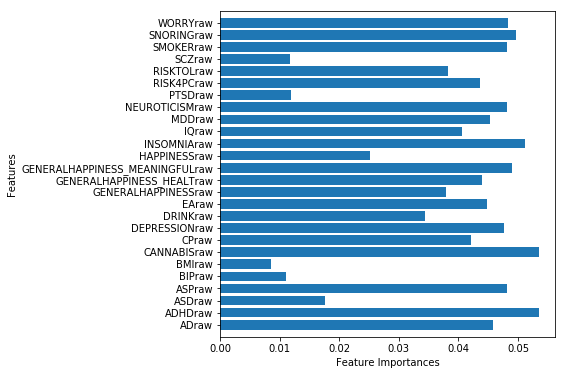

1. Feature Importances.......................
	 [0.04575929 0.05350291 0.01756026 0.04810289 0.01107259 0.00851864
 0.05347791 0.04211437 0.04764618 0.03444005 0.04485278 0.03785824
 0.04393045 0.04898916 0.02513618 0.05117097 0.04064979 0.04534422
 0.04813498 0.01195847 0.0436647  0.03823222 0.0117789  0.04816253
 0.04958289 0.04835845]
2. best train parameter......................
	 {'max_depth': 80, 'n_estimators': 20}
3. best train score..........................
	 0.5030661196900404


4. ROC-AUC...................................
	 0.5
5. f1 score..................................
	 0.0
6. Confusion matrix..........................
[[839   0]
 [ 65   0]]
7. Classify report...........................
             precision    recall  f1-score   support

          0       0.93      1.00      0.96       839
          1       0.00      0.00      0.00        65

avg / total       0.86      0.93      0.89       904

8. Accuracy score............................
	 0.9280973451327433


--

/home/ubuntu/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/ubuntu/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


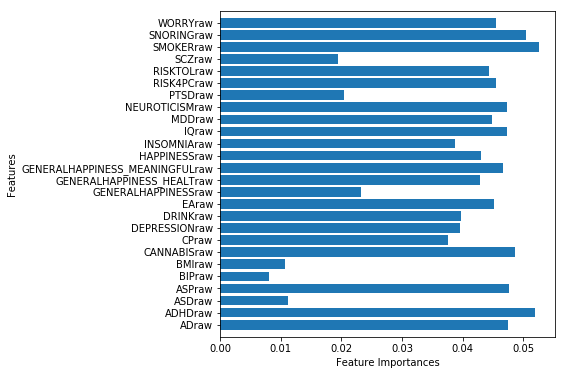

1. Feature Importances.......................
	 [0.04743639 0.05196413 0.01121399 0.04766964 0.00803917 0.01072042
 0.04859416 0.03765946 0.03957653 0.03966938 0.04512519 0.02321016
 0.04290278 0.04665685 0.04303456 0.0387184  0.04739006 0.04482026
 0.04731698 0.02037032 0.0455591  0.04439857 0.01941927 0.05260563
 0.05042059 0.04550803]
2. best train parameter......................
	 {'max_depth': 70, 'n_estimators': 20}
3. best train score..........................
	 0.5170418573790518


4. ROC-AUC...................................
	 0.5
5. f1 score..................................
	 0.0
6. Confusion matrix..........................
[[837   0]
 [ 67   0]]
7. Classify report...........................
             precision    recall  f1-score   support

          0       0.93      1.00      0.96       837
          1       0.00      0.00      0.00        67

avg / total       0.86      0.93      0.89       904

8. Accuracy score............................
	 0.9258849557522124


--

/home/ubuntu/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/ubuntu/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


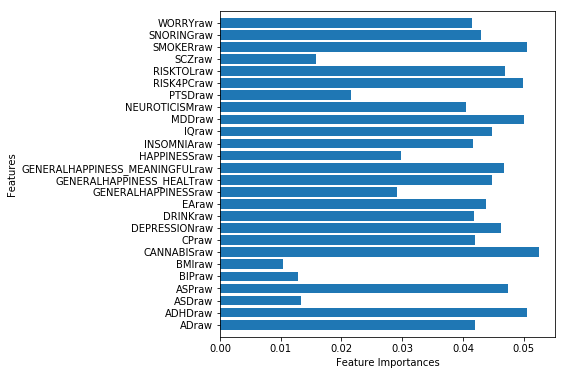

1. Feature Importances.......................
	 [0.04195288 0.05058578 0.01339106 0.04744658 0.01283278 0.0103622
 0.05252844 0.04199429 0.04619908 0.04188707 0.043865   0.02915703
 0.04487173 0.04684509 0.02979753 0.04165474 0.04474308 0.05004259
 0.04043139 0.02151093 0.04994525 0.04694449 0.01584121 0.05056195
 0.04304931 0.0415585 ]
2. best train parameter......................
	 {'max_depth': 40, 'n_estimators': 40}
3. best train score..........................
	 0.5085320108957454


4. ROC-AUC...................................
	 0.5
5. f1 score..................................
	 0.0
6. Confusion matrix..........................
[[844   0]
 [ 60   0]]
7. Classify report...........................
             precision    recall  f1-score   support

          0       0.93      1.00      0.97       844
          1       0.00      0.00      0.00        60

avg / total       0.87      0.93      0.90       904

8. Accuracy score............................
	 0.9336283185840708


---

/home/ubuntu/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/ubuntu/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


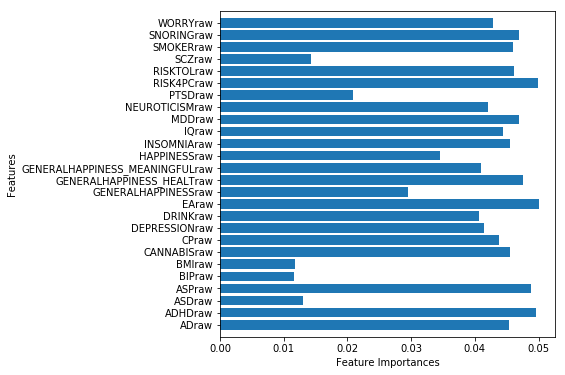

1. Feature Importances.......................
	 [0.0452938  0.04955717 0.01300119 0.04885751 0.01153281 0.01181343
 0.04548241 0.04383824 0.04136861 0.04066479 0.05006247 0.02950918
 0.04752705 0.0410181  0.0345879  0.04555204 0.0443658  0.04689248
 0.04203205 0.02087727 0.04985283 0.04618263 0.01424446 0.04606941
 0.04698175 0.04283465]
2. best train parameter......................
	 {'max_depth': 20, 'n_estimators': 60}
3. best train score..........................
	 0.498937638505596


4. ROC-AUC...................................
	 0.5
5. f1 score..................................
	 0.0
6. Confusion matrix..........................
[[838   0]
 [ 66   0]]
7. Classify report...........................
             precision    recall  f1-score   support

          0       0.93      1.00      0.96       838
          1       0.00      0.00      0.00        66

avg / total       0.86      0.93      0.89       904

8. Accuracy score............................
	 0.9269911504424779


---

/home/ubuntu/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/ubuntu/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


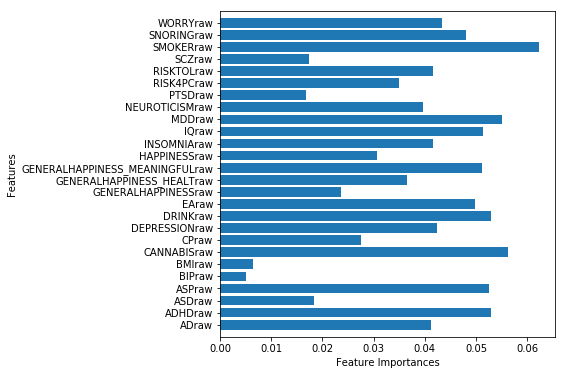

1. Feature Importances.......................
	 [0.04115405 0.05296197 0.01842428 0.0524827  0.00509491 0.00640628
 0.05634021 0.02748788 0.04243352 0.05292319 0.0497359  0.02367615
 0.03654467 0.05115294 0.03073953 0.04163571 0.0513824  0.05512931
 0.03966875 0.01679699 0.03502282 0.04158915 0.01741845 0.06230545
 0.04814193 0.04335083]
2. best train parameter......................
	 {'max_depth': 10, 'n_estimators': 20}
3. best train score..........................
	 0.5303328989284993


4. ROC-AUC...................................
	 0.4994061757719715
5. f1 score..................................
	 0.0
6. Confusion matrix..........................
[[841   1]
 [ 61   0]]
7. Classify report...........................
             precision    recall  f1-score   support

          0       0.93      1.00      0.96       842
          1       0.00      0.00      0.00        61

avg / total       0.87      0.93      0.90       903

8. Accuracy score............................
	 0.931339

In [13]:
import os
inner_cv = KFold(n_splits = k_fold, shuffle=False, random_state = 123)
outer_cv = KFold(n_splits = k_fold, shuffle=False, random_state = 123)
loop=1
for train_index, test_index in outer_cv.split(X, y):
    print('\n')
    print('-'*50)
    print('Loop: ', loop)
    
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    #No Tuning
#     rf = RandomForestClassifier(n_estimators= 100, min_samples_leaf=5)
#     rf.fit(X_train, y_train)
#     y_pred = rf.predict(X_test)
    
    #Tuning
    rf = RandomForestClassifier()
    params = {'n_estimators': np.arange(20, 200, 20),
              'max_depth': np.arange(10, 100, 10)}
    rf_grid = GridSearchCV(estimator = rf, param_grid = params, cv = inner_cv, scoring='roc_auc', n_jobs=-1, return_train_score=True)
    rf_grid.fit(X_train, y_train)
    y_pred=rf_grid.predict(X_test)
    
    result = pd.DataFrame(rf_grid.cv_results_)[['mean_test_score', 'std_test_score', 'params']]
    if not os.path.exists("./TuningResult/"):
        os.mkdir("./TuningResult/")
    filename = "TuningResult/KSAD_12_HT"+str(loop)+".csv"
    result.to_csv(filename, index=False)
    
    best_est = rf_grid.best_estimator_
    plot_feature_importances(best_est)
    
    print("{:.<45}".format("1. Feature Importances"))
    print("\t",best_est.feature_importances_)
    
    print("{:.<45}".format("2. best train parameter"))
    print("\t",rf_grid.best_params_)
    print("{:.<45}".format("3. best train score"))
    print("\t",rf_grid.best_score_)
    
    print("\n")
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    print("{:.<45}".format("4. ROC-AUC"))
    print("\t",roc_auc)
    
    f1 = f1_score(y_test, y_pred, average='binary')
    print("{:.<45}".format("5. f1 score"))
    print("\t",f1)
    print("{:.<45}".format("6. Confusion matrix"))
    print(confusion_matrix(y_test, y_pred))
    print("{:.<45}".format("7. Classify report"))
    print(classification_report(y_test, y_pred))
    print("{:.<45}".format("8. Accuracy score"))
    print("\t",accuracy_score(y_test, y_pred))
    
    loop += 1

In [16]:
X = my_data.iloc[:, 27:53]
features = X.columns
X=X.to_numpy()



--------------------------------------------------
Loop:  1


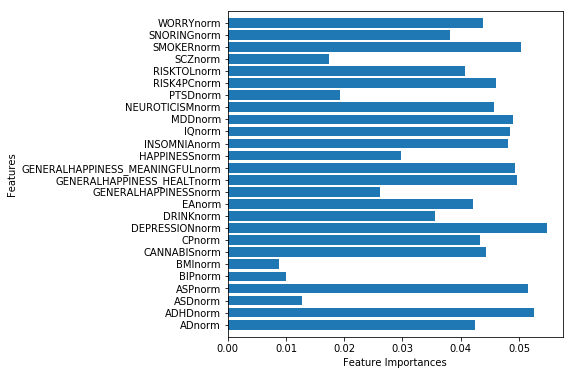

1. Feature Importances.......................
	 [0.0424308  0.05261591 0.01275079 0.05151308 0.00996693 0.00872765
 0.04434774 0.04336184 0.05476395 0.03550998 0.0421565  0.02609036
 0.04969514 0.04928014 0.02973609 0.04812495 0.04854918 0.04904098
 0.04570259 0.01918217 0.04598225 0.04079516 0.01741713 0.05028634
 0.03818595 0.04378641]
2. best train parameter......................
	 {'max_depth': 20, 'n_estimators': 40}
3. best train score..........................
	 0.5005227025801728


4. ROC-AUC...................................
	 0.5
5. f1 score..................................
	 0.0
6. Confusion matrix..........................
[[839   0]
 [ 65   0]]
7. Classify report...........................
             precision    recall  f1-score   support

          0       0.93      1.00      0.96       839
          1       0.00      0.00      0.00        65

avg / total       0.86      0.93      0.89       904

8. Accuracy score............................
	 0.9280973451327433


--

/home/ubuntu/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/ubuntu/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


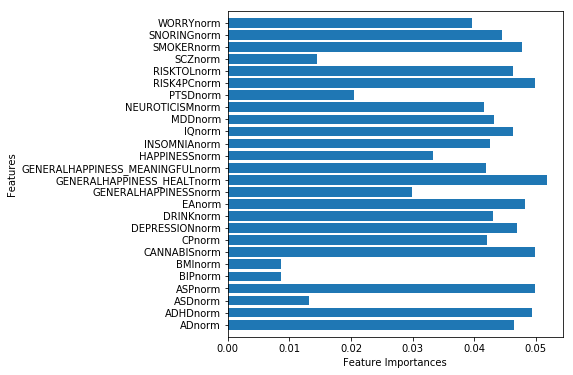

1. Feature Importances.......................
	 [0.04641723 0.04931164 0.01320634 0.04985308 0.00856252 0.00866394
 0.04987271 0.04207026 0.04699312 0.04298005 0.04831744 0.0299063
 0.05176784 0.04187027 0.03336652 0.04261017 0.04623972 0.04318241
 0.04167147 0.02051012 0.04987483 0.0462931  0.01455667 0.04777181
 0.04444262 0.03968782]
2. best train parameter......................
	 {'max_depth': 60, 'n_estimators': 60}
3. best train score..........................
	 0.5142272736132838


4. ROC-AUC...................................
	 0.5
5. f1 score..................................
	 0.0
6. Confusion matrix..........................
[[837   0]
 [ 67   0]]
7. Classify report...........................
             precision    recall  f1-score   support

          0       0.93      1.00      0.96       837
          1       0.00      0.00      0.00        67

avg / total       0.86      0.93      0.89       904

8. Accuracy score............................
	 0.9258849557522124


---

/home/ubuntu/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/ubuntu/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


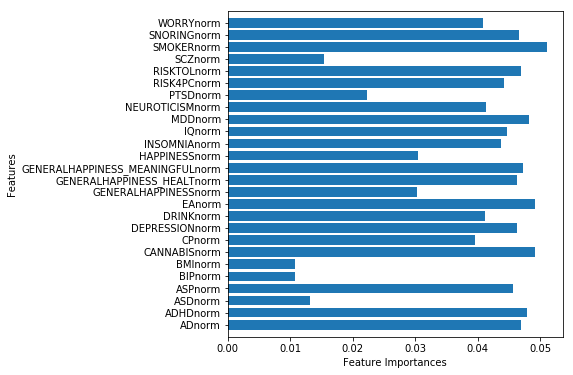

1. Feature Importances.......................
	 [0.04697034 0.04791682 0.01314896 0.04559129 0.01069224 0.01071343
 0.04920832 0.03954563 0.0462924  0.04122255 0.04923485 0.03033538
 0.04631678 0.047204   0.03038296 0.04381162 0.04465722 0.0482502
 0.04129029 0.02227712 0.04424138 0.04690409 0.01534819 0.05105459
 0.04655654 0.0408328 ]
2. best train parameter......................
	 {'max_depth': 40, 'n_estimators': 80}
3. best train score..........................
	 0.5040102358813767


4. ROC-AUC...................................
	 0.5
5. f1 score..................................
	 0.0
6. Confusion matrix..........................
[[844   0]
 [ 60   0]]
7. Classify report...........................
             precision    recall  f1-score   support

          0       0.93      1.00      0.97       844
          1       0.00      0.00      0.00        60

avg / total       0.87      0.93      0.90       904

8. Accuracy score............................
	 0.9336283185840708


---

/home/ubuntu/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/ubuntu/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


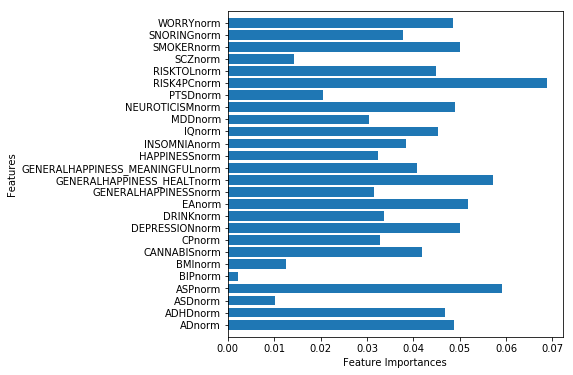

1. Feature Importances.......................
	 [0.04882575 0.04694677 0.01008532 0.05909532 0.0022308  0.01263866
 0.04198563 0.03277745 0.04999035 0.03372433 0.05189036 0.03142407
 0.05729199 0.04070469 0.03232649 0.03833096 0.0452885  0.03048767
 0.04909841 0.020529   0.06877958 0.04494549 0.01425509 0.0500168
 0.03775394 0.04857659]
2. best train parameter......................
	 {'max_depth': 10, 'n_estimators': 20}
3. best train score..........................
	 0.5103522757923249


4. ROC-AUC...................................
	 0.5
5. f1 score..................................
	 0.0
6. Confusion matrix..........................
[[838   0]
 [ 66   0]]
7. Classify report...........................
             precision    recall  f1-score   support

          0       0.93      1.00      0.96       838
          1       0.00      0.00      0.00        66

avg / total       0.86      0.93      0.89       904

8. Accuracy score............................
	 0.9269911504424779


---

/home/ubuntu/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/ubuntu/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


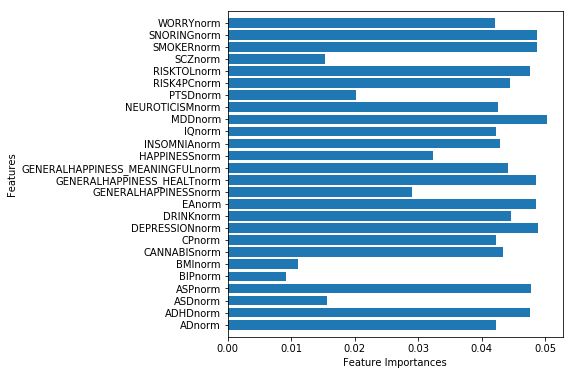

1. Feature Importances.......................
	 [0.04219712 0.04763769 0.01558263 0.04781756 0.00909806 0.01108746
 0.04338188 0.0422269  0.04881813 0.04453291 0.04859823 0.02893646
 0.04858398 0.04417583 0.03235294 0.04291816 0.04224354 0.05023218
 0.04258216 0.02020724 0.04449809 0.04753793 0.01533871 0.04871937
 0.04868027 0.04201457]
2. best train parameter......................
	 {'max_depth': 20, 'n_estimators': 140}
3. best train score..........................
	 0.5152202126434862


4. ROC-AUC...................................
	 0.5
5. f1 score..................................
	 0.0
6. Confusion matrix..........................
[[842   0]
 [ 61   0]]
7. Classify report...........................
             precision    recall  f1-score   support

          0       0.93      1.00      0.97       842
          1       0.00      0.00      0.00        61

avg / total       0.87      0.93      0.90       903

8. Accuracy score............................
	 0.9324473975636767


/home/ubuntu/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/ubuntu/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [17]:
import os
inner_cv = KFold(n_splits = k_fold, shuffle=False, random_state = 123)
outer_cv = KFold(n_splits = k_fold, shuffle=False, random_state = 123)
loop=1
for train_index, test_index in outer_cv.split(X, y):
    print('\n')
    print('-'*50)
    print('Loop: ', loop)
    
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    #No Tuning
#     rf = RandomForestClassifier(n_estimators= 100, min_samples_leaf=5)
#     rf.fit(X_train, y_train)
#     y_pred = rf.predict(X_test)
    
    #Tuning
    rf = RandomForestClassifier()
    params = {'n_estimators': np.arange(20, 200, 20),
              'max_depth': np.arange(10, 100, 10)}
    rf_grid = GridSearchCV(estimator = rf, param_grid = params, cv = inner_cv, scoring='roc_auc', n_jobs=-1, return_train_score=True)
    rf_grid.fit(X_train, y_train)
    y_pred=rf_grid.predict(X_test)
    
    result = pd.DataFrame(rf_grid.cv_results_)[['mean_test_score', 'std_test_score', 'params']]
    if not os.path.exists("./TuningResult/"):
        os.mkdir("./TuningResult/")
    filename = "TuningResult/KSAD_12_HT"+str(loop)+"_norm.csv"
    result.to_csv(filename, index=False)
    
    best_est = rf_grid.best_estimator_
    plot_feature_importances(best_est)
    
    print("{:.<45}".format("1. Feature Importances"))
    print("\t",best_est.feature_importances_)
    
    print("{:.<45}".format("2. best train parameter"))
    print("\t",rf_grid.best_params_)
    print("{:.<45}".format("3. best train score"))
    print("\t",rf_grid.best_score_)
    
    print("\n")
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    print("{:.<45}".format("4. ROC-AUC"))
    print("\t",roc_auc)
    
    f1 = f1_score(y_test, y_pred, average='binary')
    print("{:.<45}".format("5. f1 score"))
    print("\t",f1)
    print("{:.<45}".format("6. Confusion matrix"))
    print(confusion_matrix(y_test, y_pred))
    print("{:.<45}".format("7. Classify report"))
    print(classification_report(y_test, y_pred))
    print("{:.<45}".format("8. Accuracy score"))
    print("\t",accuracy_score(y_test, y_pred))
    
    loop += 1